# Try to  finding tweets that include ’strong sentiment’ directed at particular countries or national groups

1.Data Integration

2.Identify keywords

3.Try to see what tweets are in specific countries.

4.Try to find negative tweets by dictionary matching.

In [22]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import os

In [23]:
os.chdir(r'D:\dataset\clear_data')

In [24]:
text_01_mining = pd.read_csv('text_01_mining.csv')
text_03mid_mining = pd.read_csv('text_03mid_mining.csv')
text_03_04_mining = pd.read_csv('text_03_04_mining.csv')

In [25]:
# tweet = pd.read_csv('data_01.csv',usecols=['text','score'])
tweet_01 = pd.read_csv('data_01.csv',usecols=['text','user_location'])
tweet_03mid = pd.read_csv('data_03mid.csv',usecols=['text','user_location'])
tweet_03_04 = pd.read_csv('data_03_04.csv',usecols=['text','user_location'])

In [26]:
print(len(tweet_01),len(tweet_03mid),len(tweet_03_04))

1477485 1352513 2442674


In [27]:
tweet_01 = tweet_01.rename(columns={"text": "tweet"})
tweet_03mid = tweet_03mid.rename(columns={"text": "tweet"})
tweet_03_04 = tweet_03_04.rename(columns={"text": "tweet"})

In [28]:
text_01_mining = pd.concat([text_01_mining,tweet_01],axis = 1)
text_03mid_mining = pd.concat([text_03mid_mining,tweet_03mid],axis = 1)
text_03_04_mining = pd.concat([text_03_04_mining,tweet_03_04],axis = 1)

In [29]:
text_01_mining.text.isna().value_counts()

False    1477387
True          98
Name: text, dtype: int64

In [30]:
text_03mid_mining.text.isna().value_counts()

False    1352425
True          88
Name: text, dtype: int64

In [31]:
text_03_04_mining.text.isna().value_counts()

False    2442484
True         190
Name: text, dtype: int64

In [32]:
text_01_mining.dropna(subset=['text'],inplace=True)
text_01_mining.drop(columns=['stopwords','word_count'],inplace=True)

text_03mid_mining.dropna(subset=['text'],inplace=True)
text_03mid_mining.drop(columns=['stopwords','word_count'],inplace=True)

text_03_04_mining.dropna(subset=['text'],inplace=True)
text_03_04_mining.drop(columns=['stopwords','word_count'],inplace=True)

In [33]:
country = ['china','chinese','hong kong','taiwan',
           'coronavirus','covid-19','covid','new coronavirus','corona virus',
           'england','united kingdom','britain',
           'europe','eu countries','european union',
           'russia','russian',
           'mexico', 'south america',
           'america','united states',
           'middle east','iran']

In [34]:
pattern = '|'.join(country)
text_01_country = text_01_mining[text_01_mining['text'].str.contains(pattern, case=False)]

text_03mid_country = text_03mid_mining[text_03mid_mining['text'].str.contains(pattern, case=False)]

text_03_04_country = text_03_04_mining[text_03_04_mining['text'].str.contains(pattern, case=False)]

In [35]:
print(len(text_01_country),len(text_03mid_country),len(text_03_04_country))

265417 265957 584278


In [36]:
tweet_country = pd.concat([text_01_country,text_03mid_country,text_03_04_country],axis = 0,join = 'inner')

In [37]:
tweet_country  = tweet_country.reset_index(drop=True)

In [38]:
tweet_country

,tweet_id,text,word,text_tag,tweet,user_location
0,1215055927264436224,allday anyone surprised ilhan omar sharing bra...,"['allday', 'anyone', 'surprised', 'ilhan', 'om...","[('allday', 'RB'), ('anyone', 'NN'), ('surpris...",RT @Louis_Allday: Anyone who is surprised that...,she/her
1,1215055922634141697,good morning everyone except gladly spread ira...,"['good', 'morning', 'everyone', 'except', 'gla...","[('good', 'JJ'), ('morning', 'NN'), ('everyone...",RT @catturd2: Good morning to everyone except ...,NaN
2,1215055917747585024,indeed remarkable like remarkable example offi...,"['indeed', 'remarkable', 'like', 'remarkable',...","[('indeed', 'RB'), ('remarkable', 'JJ'), ('lik...","This is indeed remarkable, just like it's a re...",United States
3,1215055918045548544,msnbc truly pathetic fake news medium outlet h...,"['msnbc', 'truly', 'pathetic', 'fake', 'news',...","[('msnbc', 'NN'), ('truly', 'RB'), ('pathetic'...",RT @Jamierodr14: WOW! \n\nMSNBC is truly Pathe...,United States
4,1215055921254227969,shot dark fizzle iran propaganda statement roc...,"['shot', 'dark', 'fizzle', 'iran', 'propaganda...","[('shot', 'NN'), ('dark', 'NN'), ('fizzle', 'N...",RT @thro_e: 😬 WHEN SHOTS IN THE DARK FIZZLE 😬\...,"Nashua, NH"
...,...,...,...,...,...,...
1115647,1245138827058065408,anyone belief chinese covid number would make ...,"['anyone', 'belief', 'chinese', 'covid', 'numb...","[('anyone', 'NN'), ('belief', 'NN'), ('chinese...",RT @UKExpat4MAGA: @KatiePavlich Anyone who bel...,"Texas, USA"
1115648,1245138825678073864,result leftover cold western propaganda decima...,"['result', 'leftover', 'cold', 'western', 'pro...","[('result', 'NN'), ('leftover', 'NN'), ('cold'...",This is a result of leftover Cold War Western ...,"Bronx, NY"
1115649,1245138816031027202,trump said fake news beginning coronavirus pre...,"['trump', 'said', 'fake', 'news', 'beginning',...","[('trump', 'NN'), ('said', 'VBD'), ('fake', 'J...","RT @funder: “Sad to see, just so sad to see,” ...","California, USA"
1115650,1245138809987219456,fake cure frivolous whatsapp forward dodgy cla...,"['fake', 'cure', 'frivolous', 'whatsapp', 'for...","[('fake', 'JJ'), ('cure', 'NN'), ('frivolous',...","The fake cures, frivolous WhatsApp forwards an...",NaN


# So I changed my strategy and did not use machine learning methods. I did two keyword scanings, the first time I selected countries and hot topics, and the second time I used the terms of disinformation. The results obtained in this way may be better.

In [39]:
disinformation = ['mainstream media','populism','useful idiots','influence','conspiracy','propaganda',
'disinformation','bogus','fact checking','deceive','made-up','fake news','interference','hoax','subversion','doctored',
'manipulate','inaccurate','untrustworthy','europe rumours','european rumours','europe fraud','european fraud',
'european hoax','europe troll','european troll','europe false','european false','europe lies','european lies','europe hoax',
'eu rumours','eu fraud','eu hoax','eu troll','eu lies','eu false','active measures','deep state','misinformation','fabrication']

In [40]:
pattern = '|'.join(disinformation)
tweet_country = tweet_country[tweet_country['text'].str.contains(pattern, case=False)]

In [41]:
print(len(tweet_country))

1005186


In [45]:
tweet_country.to_csv('tweet_country.csv',index = False)

In [46]:
tweet_country.text.to_csv('tweet_country.txt', header=None, index=False, sep=" ")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# Use the sentiment toolkit to analyze the sentiment of each tweet
1.Reference:http://sentistrength.wlv.ac.uk/

2.Use the sentiment toolkit to analyze the sentiment of all tweet text(use tweet_country.txt)
(The tool already have an emotional dictionary)

3.Read new data after having emotional tags

In [47]:
tweet_sentiment = pd.read_table('tweet_country+results.txt')

In [48]:
tweet_sentiment.head()

,allday anyone surprised ilhan omar sharing brazenly fake propaganda china obviously paying,Translation,Positive,Negative,EmotionRationale
0,good morning everyone except gladly spread ira...,good morning everyone except gladly spread ira...,2,-2,good[1] morning[0] everyone[0] except[0] glad...
1,indeed remarkable like remarkable example offi...,indeed remarkable like remarkable example offi...,2,-2,indeed[0] remarkable[0] like[1] remarkable[0]...
2,msnbc truly pathetic fake news medium outlet h...,msnbc truly pathetic fake news medium outlet h...,2,-3,msnbc[0] truly[1] pathetic[-2] fake[-1] news[...
3,shot dark fizzle iran propaganda statement roc...,shot dark fizle iran propaganda statement rock...,1,-3,shot[-1] dark[0] fizzle/fizle[0] iran[0] prop...
4,fact checking trump address iran attack trump ...,fact checking trump address iran attack trump ...,1,-3,fact[0] checking[0] trump[0] address[0] iran[...


In [49]:
tweet_sentiment['sentiment'] = tweet_sentiment.Positive + tweet_sentiment.Negative

In [50]:
tweet_sentiment.head()

,allday anyone surprised ilhan omar sharing brazenly fake propaganda china obviously paying,Translation,Positive,Negative,EmotionRationale,sentiment
0,good morning everyone except gladly spread ira...,good morning everyone except gladly spread ira...,2,-2,good[1] morning[0] everyone[0] except[0] glad...,0
1,indeed remarkable like remarkable example offi...,indeed remarkable like remarkable example offi...,2,-2,indeed[0] remarkable[0] like[1] remarkable[0]...,0
2,msnbc truly pathetic fake news medium outlet h...,msnbc truly pathetic fake news medium outlet h...,2,-3,msnbc[0] truly[1] pathetic[-2] fake[-1] news[...,-1
3,shot dark fizzle iran propaganda statement roc...,shot dark fizle iran propaganda statement rock...,1,-3,shot[-1] dark[0] fizzle/fizle[0] iran[0] prop...,-2
4,fact checking trump address iran attack trump ...,fact checking trump address iran attack trump ...,1,-3,fact[0] checking[0] trump[0] address[0] iran[...,-2


In [51]:
tweet_country = pd.read_csv('tweet_country.csv')
tweet_english_negative = pd.concat([tweet_country,tweet_sentiment.sentiment],axis = 1)

In [52]:
tweet_english_negative = tweet_english_negative[tweet_english_negative.sentiment < 0 ]

In [56]:
tweet_english_negative = tweet_english_negative.reset_index(drop = True)

In [57]:
tweet_english_negative.to_csv('tweet_english_negative.csv',index = False)

In [58]:
#Read the CSV file again for check 
tweet_english_negative = pd.read_csv('tweet_english_negative.csv')
tweet_english_negative

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
0,1215055917747585024,indeed remarkable like remarkable example offi...,"['indeed', 'remarkable', 'like', 'remarkable',...","[('indeed', 'RB'), ('remarkable', 'JJ'), ('lik...","This is indeed remarkable, just like it's a re...",United States,-1.0
1,1215055918045548544,msnbc truly pathetic fake news medium outlet h...,"['msnbc', 'truly', 'pathetic', 'fake', 'news',...","[('msnbc', 'NN'), ('truly', 'RB'), ('pathetic'...",RT @Jamierodr14: WOW! \n\nMSNBC is truly Pathe...,United States,-2.0
2,1215055921254227969,shot dark fizzle iran propaganda statement roc...,"['shot', 'dark', 'fizzle', 'iran', 'propaganda...","[('shot', 'NN'), ('dark', 'NN'), ('fizzle', 'N...",RT @thro_e: 😬 WHEN SHOTS IN THE DARK FIZZLE 😬\...,"Nashua, NH",-2.0
3,1215055917227495424,fact checking trump address iran attack trump ...,"['fact', 'checking', 'trump', 'address', 'iran...","[('fact', 'NN'), ('checking', 'VBG'), ('trump'...",Fact-checking Trump’s address on the Iran atta...,NaN,-3.0
4,1215055915520491520,iran claim killed american pentagon said zero ...,"['iran', 'claim', 'killed', 'american', 'penta...","[('iran', 'NN'), ('claim', 'NN'), ('killed', '...","RT @sxdoc: Iran claims it killed 30 Americans,...",UK,-2.0
...,...,...,...,...,...,...,...
750647,1245138890861805569,thanks toxic sloooow cooked stew racism americ...,"['thanks', 'toxic', 'slooow', 'cooked', 'stew'...","[('thanks', 'NNS'), ('toxic', 'VBP'), ('sloooo...","RT @morbid_elation: Thanks to a toxic, sloooow...","Dublin City, Ireland",-1.0
750648,1245138856506253316,suggests china taking page russia disinformati...,"['suggests', 'china', 'taking', 'page', 'russi...","[('suggests', 'NNS'), ('china', 'VBP'), ('taki...",RT @SecureDemocracy: This suggests that China ...,USA,-1.0
750649,1245138827058065408,anyone belief chinese covid number would make ...,"['anyone', 'belief', 'chinese', 'covid', 'numb...","[('anyone', 'NN'), ('belief', 'NN'), ('chinese...",RT @UKExpat4MAGA: @KatiePavlich Anyone who bel...,"Texas, USA",-1.0
750650,1245138825678073864,result leftover cold western propaganda decima...,"['result', 'leftover', 'cold', 'western', 'pro...","[('result', 'NN'), ('leftover', 'NN'), ('cold'...",This is a result of leftover Cold War Western ...,"Bronx, NY",-1.0


# tweet about China

In [59]:
china = ['china','chinese']
pattern = '|'.join(china)
tweet_china = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]

In [60]:
print(len(tweet_china))

190587


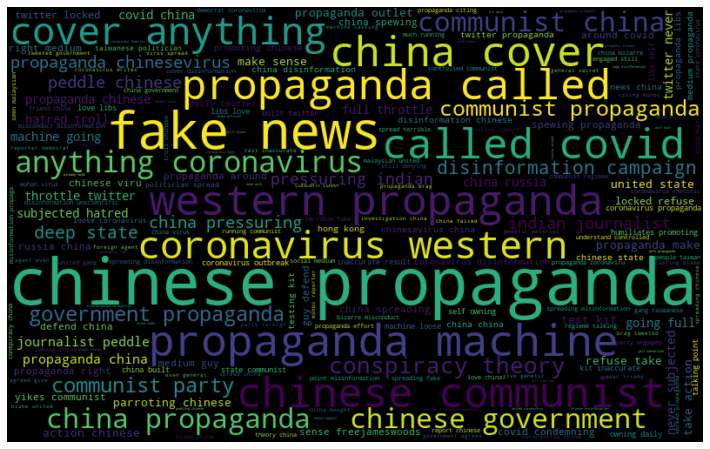

In [61]:
all_words = ' '.join([text for text in tweet_china['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# tweet about UK

In [62]:
england = ['england','united kingdom','britain']
pattern = '|'.join(england)
tweet_england = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]

In [63]:
len(tweet_england)

4041

In [92]:
for text in tweet_england.tweet:
    print(text)
    print('-----------------------------')

RT @RampTheresa: Svetlana Lokhova, another victim of the deep state in Great Britain, dropped a twitter thread this past weekend that total…
-----------------------------
RT @SimonBruni: Liberal Britain is strong, flexible, forward- and outward-looking; its identity isn't threatened by foreign influence or ne…
-----------------------------
RT @RampTheresa: Svetlana Lokhova, another victim of the deep state in Great Britain, dropped a twitter thread this past weekend that total…
-----------------------------
RT @RampTheresa: Svetlana Lokhova, another victim of the deep state in Great Britain, dropped a twitter thread this past weekend that total…
-----------------------------
RT @RampTheresa: Svetlana Lokhova, another victim of the deep state in Great Britain, dropped a twitter thread this past weekend that total…
-----------------------------
RT @RampTheresa: Svetlana Lokhova, another victim of the deep state in Great Britain, dropped a twitter thread this past weekend that total…
----

https://t.co/EKsRIL1N6V
-----------------------------
RT @boblister_poole: Scholar spreads Iranian propaganda in Britain
#PritiPatel Deport Him Now!
https://t.co/EKsRIL1N6V
-----------------------------
RT @boblister_poole: Scholar spreads Iranian propaganda in Britain
#PritiPatel Deport Him Now!
https://t.co/EKsRIL1N6V
-----------------------------
@LironBerisha @TheEconomist Liron dear stupid is you are, stratcom of NATO, 77th brigade of Britain, cybercom of Pentagon all these units created at first for propaganda in the Net. yes American taxpyers' money goes not "fighting cyber threats" they go to ogranaize unrests like we see in HK or Paris.
-----------------------------
@Lil_Bardi @Defenses09 that's just a fact. There's no conspiracy there. To imply that Britain's government is shit bc the royal family runs it instead of the fact that Gov itself has flaws and will always be shit is honestly hysterical. again, not everything is a conspiracy.
-----------------------------
@vksparks 

-----------------------------
RT @dmedialab: "Britain's government secretly funded Reuters in the 1960s and 70s at the behest of an anti-Soviet propaganda unit linked to…
-----------------------------
RT @JohannaSaunders: Start acting like a Government of the United Kingdom and less like a hateful, propaganda-fuelled, Crime Syndicate.

Th…
-----------------------------
RT @JohannaSaunders: Start acting like a Government of the United Kingdom and less like a hateful, propaganda-fuelled, Crime Syndicate.

Th…
-----------------------------
RT @JohannaSaunders: Start acting like a Government of the United Kingdom and less like a hateful, propaganda-fuelled, Crime Syndicate.

Th…
-----------------------------
True to its growing reputation for being untrustworthy. Trust is a valuable commodity in the world. A 'sine qua non' for trade deals Britain has squandered it by the bucket load.  https://t.co/T1Q9qNLPdB
-----------------------------
@RobertBuckland I Am Certain By Now #victorialive My

RT @TEnglishSport: Eddie Jones accusing referee of bias against England. Classless and inaccurate. If no action is taken against him for th…
-----------------------------
RT @TEnglishSport: Eddie Jones accusing referee of bias against England. Classless and inaccurate. If no action is taken against him for th…
-----------------------------
RT @TEnglishSport: Eddie Jones accusing referee of bias against England. Classless and inaccurate. If no action is taken against him for th…
-----------------------------
@Moonlit_Tulips @CharlotteSlalom @it_again123 @SammiMaryJane1 @DHSCgovuk @CMO_England @PHE_uk @NHSEngland Loads of misinformation ... mostly from our government .. ‘it won’t spread as much in summer’ (really.. have they looked at the countries affected)
-----------------------------
RT @TEnglishSport: Eddie Jones accusing referee of bias against England. Classless and inaccurate. If no action is taken against him for th…
-----------------------------
RT @TEnglishSport: Eddie Jones a

The orchestrated propaganda use of this cartoon highlights clearly the far right elements destroying the currently United Kingdom #ReleaseTheRussiaReport @BorisJohnson @10DowningStreet @Conservatives @sajidjavid @NickyMorgan01 @Jacob_Rees_Mogg @toadmeister @JuliaHB1 @piersmorgan
-----------------------------
RT @EUcitizen99: That can't be right -must be fake news! -England's the best country in the world.  For our English Brexit Nationalist zeal…
-----------------------------
RT @Reuters: Britain sets up team to tackle coronavirus disinformation https://t.co/hPaueSkm6F https://t.co/b9ua8e4ZrJ
-----------------------------
@skybluesam @Kate2Spirit @Hitchslap12 @lindakeyes14 @Nigel_Farage Yeah it's a global conspiracy stopping little Britain from leaving the EU. 

Only 400+ brave MP's, the sun, the daily mail, the express and the telegraph have enabled us to leave
-----------------------------
RT @Reuters: Britain sets up team to tackle coronavirus disinformation https://t.co/hPaueSkm6F 

-----------------------------
If this is #fake news then @CMO_England needs to kill it ASAP!!
-----------------------------
@Russarnold22 @the_resistor @realDonaldTrump @SpeakerPelosi You must be getting fake news from our fake President, not news from other countries, like England, check out British news,The Guardian.
-----------------------------
Gilmore Girls is New England propaganda
-----------------------------
@Athena6931 @dionne4210 @SteveRightNLeft @melvyn_waters @alg_author @LeMightyGoose1 @Kerriecounty_ @PatrioticTalk14 Mark and Laura get out of your racist, conspiracy,ego centric,echo chamber and really be patriots and volunteer to help Britain.

Today our group have supported Britain in assisting the NHS alongside all ethnicities for the benefit of Britain.

The real PATRIOTS!!!!
-----------------------------
Conspiracy theorists: China is using biological warfare to dominate the world!!!

Germany, France, England, the US: https://t.co/MkO7L68ky7
--------------------------

RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @MalamMBs_Daily: There is fake news going round that Her Majesty Queen Elizabeth II of the United Kingdom has been tested positive for C…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
----

@BRAVEmediaMO @jeffersoncounty CURE COVID-19 With the 3 Step Diet Plan 
Corona Puzzle Solved - 576,185 Views - 14 Mar 2020* 

https://t.co/86vNTJehQf 

This Video Not Only Exposes The Corona Conspiracy With Tthe Help of Latest Research Papers From New England Medical Journal And The Lancet.
-----------------------------
@DrJaneMunro @MelissaSweetDr CURE COVID-19 With the 3 Step Diet Plan 
Corona Puzzle Solved - 576,185 Views - 14 Mar 2020* 

https://t.co/86vNTJehQf 

This Video Not Only Exposes The Corona Conspiracy With Tthe Help of Latest Research Papers From New England Medical Journal And The Lancet.
-----------------------------
This is fake news! Anyone who knows Britain's royal protocol knows that the UK pays for the security of all the royals, whether they are working royals or not, wherever they are. Some countries assist when they are visiting, but that's all.
#harryandmegan #sussex #dukedutchess
-----------------------------
@itsdhruvism CURE COVID-19 With the 3 Step Diet Pl

-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurat

-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
RT @GabrielScally: This clip of one of England's Deputy Chief Medical Officers contains an amazing set of inaccurate and inappropriate stat…
-----------------------------
@trizah_tee That lady Victoria is the system, deep state. After the leader of the free world, she is the 2nd if not

@piersmorgan More inaccurate news fro the buffoon Piers Morgan. Get your facts right Piersy jack has never played for England (at top level)
-----------------------------
Things are changing england, for the better. And do you know who we have to thank for this?! Think. Who wanted us of the fake news and the cabals plans for the world? Who has the media trained you to hate?! Think.. this is real and it’s going to be awesome!
-----------------------------
RT @G00DM0RNlN: @MetroUK Is this Fake News or was the News Fake ? Britain we need to test Boris Again.  The rate of their recovery is Baffl…
-----------------------------
All England Club to offer players financial support during lockdown - what's that to do with Djokovic?
Stu Fraser propaganda machine.
"Djokovic and the top-ranked players earn vast amounts more"... Stu earning more than he deserves, is the problem. https://t.co/vtd9dJgJgm
-----------------------------
@GMB @susannareid100 How is good morning Britain essential? how the

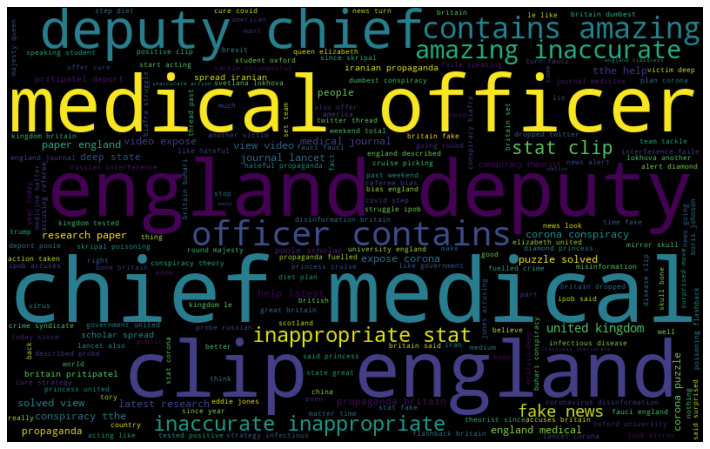

In [65]:
all_words = ' '.join([text for text in tweet_england['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# tweet about Russia

In [66]:
russia = ['russia','russian']
pattern = '|'.join(russia)
tweet_russia =tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]

In [67]:
len(tweet_russia)

128783

In [68]:
for text in tweet_russia.text[0:1000]:
    print(text)
    print('-----------------------------')

indeed remarkable like remarkable example official russian state propaganda line
-----------------------------
demean debase election process cooperating russian interference demean office demean press demean decorated soldier demean congressional leadership demean judge demean constitution proverbial straw perhaps demeaning senate
-----------------------------
hippie blueeyes pete ofurniture lie military also russia targeting military personnel disinformation trump keep voter know truth thankfully vet know well informed
-----------------------------
seeing russian disinformation micro target servicemembers vet family since time
-----------------------------
hope christmas break made forget russian interference report
-----------------------------
sisko brexit food shortage medicine shortage lie breaking russia interference dark money good friday agreement unde
-----------------------------
report russian interference ready made public election
-----------------------------
seeing russ

well read uncovered damning evidence trump attempt work russia election interference well repeated lie tie russia finally attempt obstruct investigation read
-----------------------------
spent year pumping every possible angle russia trump collusion conspiracy blew face
-----------------------------
question count mostly russian propaganda bot ithinknot
-----------------------------
news russian propaganda want iran russia sell lot lot weapon fight force directly iran proxy
-----------------------------
spent year pumping every possible angle russia trump collusion conspiracy blew face
-----------------------------
leslie attack righteous evidence orangutan russian propaganda spewing hitler also studied speech look worldwide politics century last tried true tactic dictator
-----------------------------
russian occupation admit military held hostage bombarded putin propaganda thanks veteran group say trump administration ignoring foreign disinformation threat washington post
----------

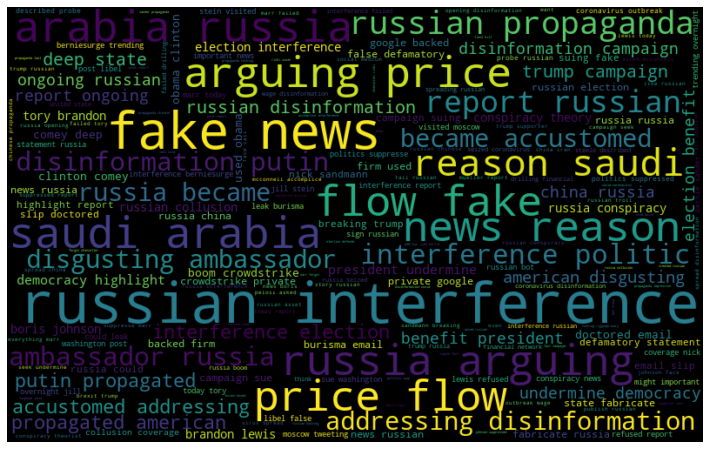

In [69]:
all_words = ' '.join([text for text in tweet_russia['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# tweet about USA

In [70]:
us = ['america','united states']
pattern = '|'.join(us)
tweet_us = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]

In [71]:
len(tweet_us)

142295

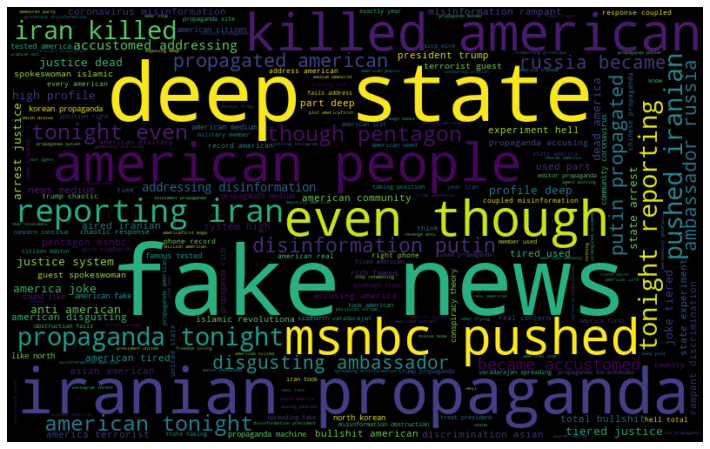

In [72]:
all_words = ' '.join([text for text in tweet_us['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# tweet about coronavirus
1.See if there is a tweet about the new coronavirus associated with the country

In [89]:
coronavirus = ['coronavirus','covid-19','covid','new coronavirus','corona virus']
pattern = '|'.join(coronavirus)
tweet_coronavirus = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]

In [90]:
print(len(tweet_coronavirus))

293949


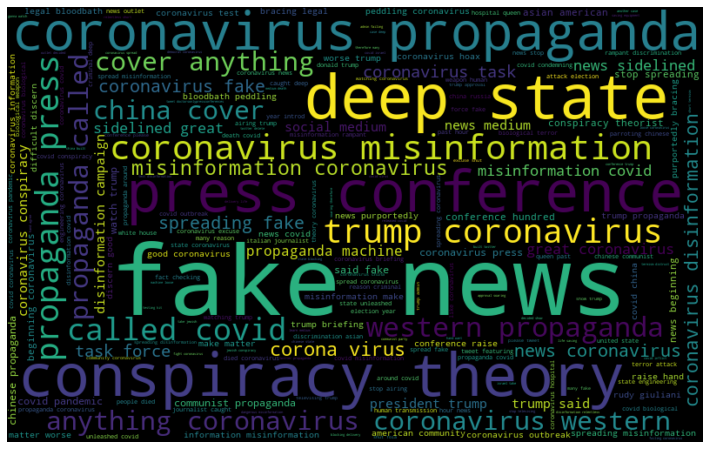

In [91]:
all_words = ' '.join([text for text in tweet_coronavirus['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#LDA主题分析

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [77]:
n_features = 1000

In [78]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(tweet_china.text_tag)

In [79]:
from sklearn.decomposition import LatentDirichletAllocation

In [80]:
n_topics = 20
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [81]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [82]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [83]:
n_top_words = 10

In [84]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
chinese chinesevirus going indian troll daily promoting russian engaged terrible
Topic #1:
vbz number hatred condemning italy blaming post taking violence faced
Topic #2:
disinformation russia spreading vbd rb time politician testing help propaga
Topic #3:
make vbp lied talking locked freejameswoods concern self claim malaysian
Topic #4:
vbn medium rb twitter vbd misinformation throttle subjected point year
Topic #5:
vbp nns people country rb know american dt tell chinaliedpeopledied
Topic #6:
global mask libs defend spain push reporter refuse general face
Topic #7:
taiwan interference election vbd discard aylward aimim mansoor prayagraj humiliation
Topic #8:
cover pressuring parroting health parrot allegedly clueless epidemic despicable doubt
Topic #9:
coronavirus vbn western blame believe jjr coming regime used article
Topic #10:
conspiracy rb theory vbd democrat turkey month trying america iran
Topic #11:
news fake rb vb vbd report want vbp using shame
Topic #12:
peddle ra